In [5]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

from alive_progress import alive_bar

%load_ext autoreload
%autoreload 2

def plot_2pc_traj(list_traj):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(len(list_traj)):
        xdata = list_traj[i][:,1]
        ydata = list_traj[i][:,2]
        zdata = list_traj[i][:,3]
        if i%2 == 0:
            ax.scatter3D(xdata, ydata, zdata)
        else:
            ax.scatter3D(xdata, ydata, zdata)
    plt.title('Torus windings')
    plt.show()
    
R = 5
r = 2
    
def torus_point(theta, phi):
    return [(r*math.cos(theta)+R)*math.cos(phi), (r*math.cos(theta)+R)*math.sin(phi), r*math.sin(theta)]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def torus_wind(theta, phi, length=10, noise=False, sigma=0.05, time_i=0, time_f=10):
    ratio = 0.735
    traj = np.zeros((time_f-time_i,4))
    for i in range(0, time_f-time_i):
        traj[i][1:] = torus_point(theta+(time_i+i)*math.pi/(4*length), phi+ratio*(time_i+i)*math.pi/(4*length))
        traj[i][0] = (time_i+i)*math.pi/length
        if noise == True:
            traj[i][1:] = np.add(traj[i][1:],sigma*np.random.randn(1,3))
    return traj

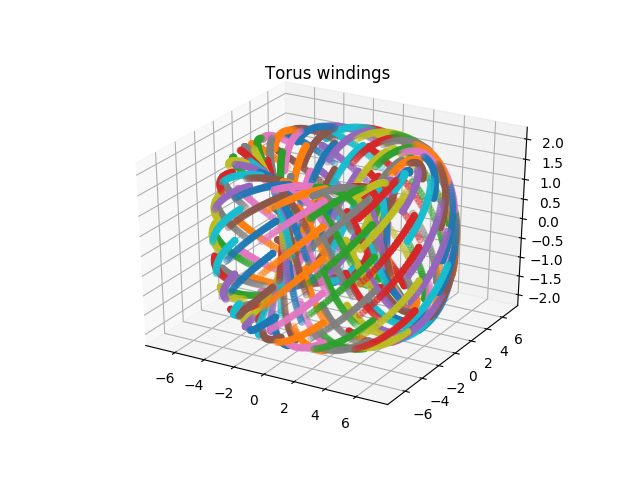

In [6]:
list_traj = []
N=15
length=25

for i in range(N):
    for j in range(N):
        list_traj.append(torus_wind(2*i*math.pi/N, 2*j*math.pi/N, length, noise=0,time_i=0, time_f=length-1))  
plot_2pc_traj(list_traj)

In [4]:
t2s = Traj2Sim()

load=True

if load == False:
    t2s.set_trajectories(list_traj)
    t2s.compute_mssd(verbose=False)
    t2s.save_bifilt(filename='torus_winding.npy')
if load == True:
    t2s.load_bifilt(filename='torus_winding.npy')

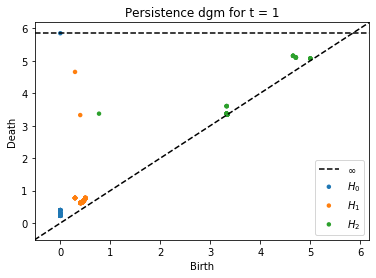

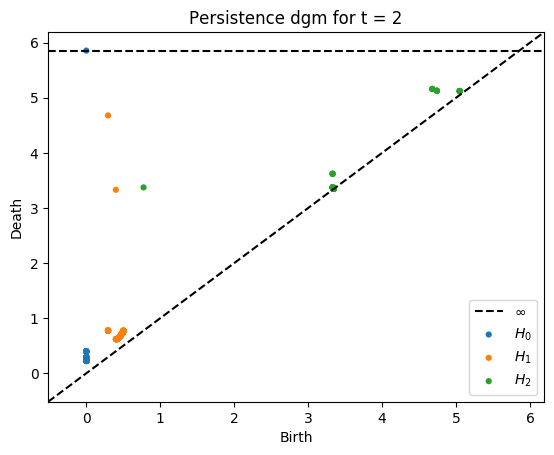

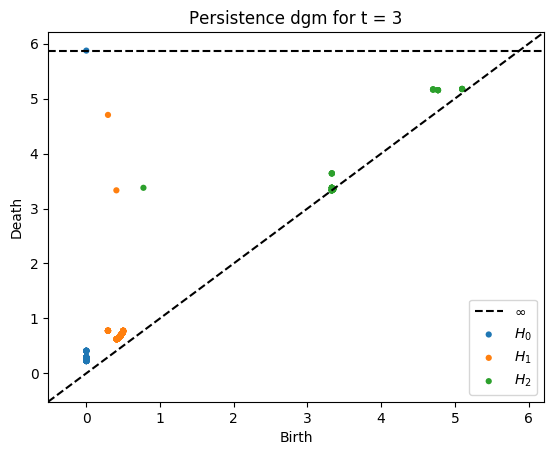

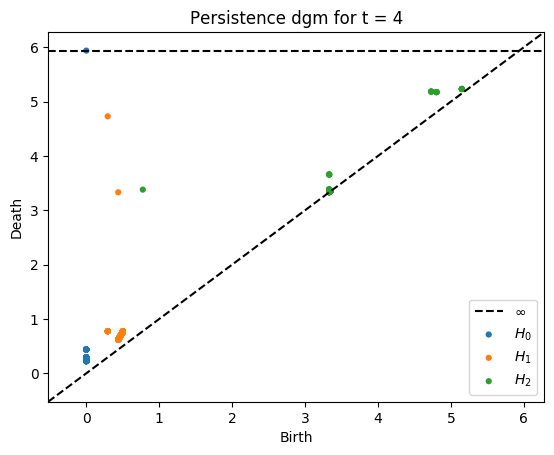

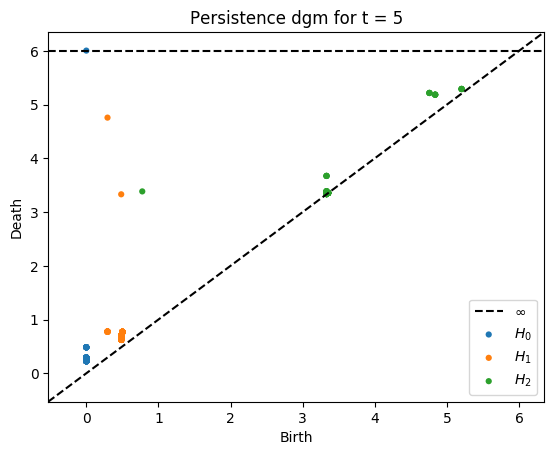

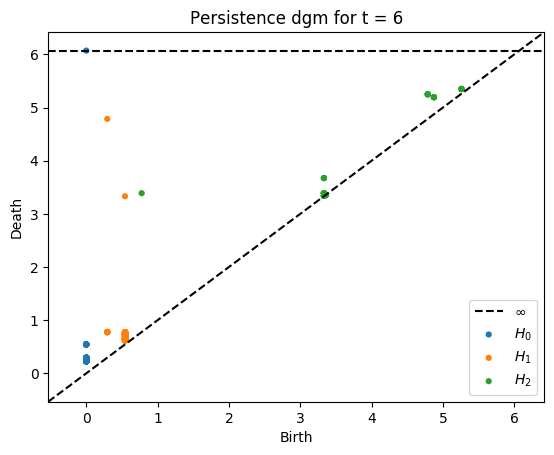

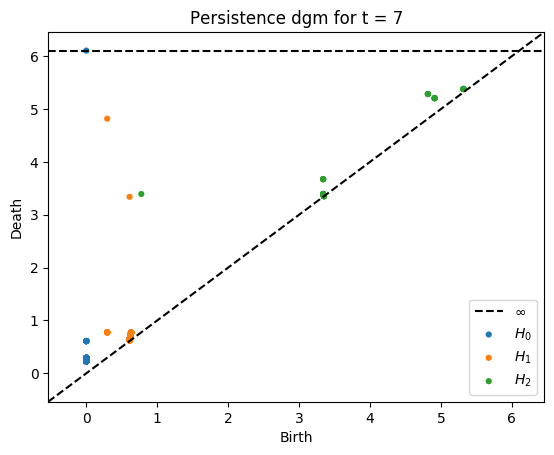

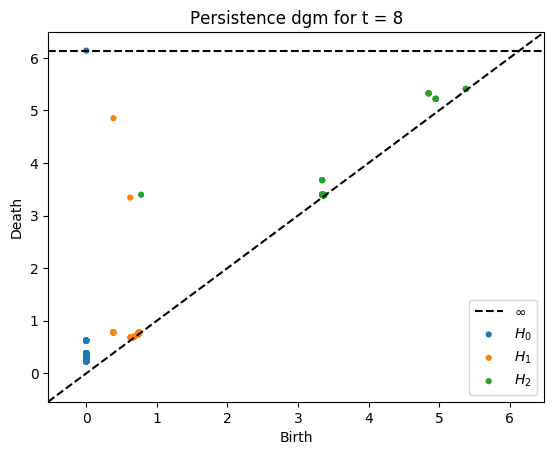

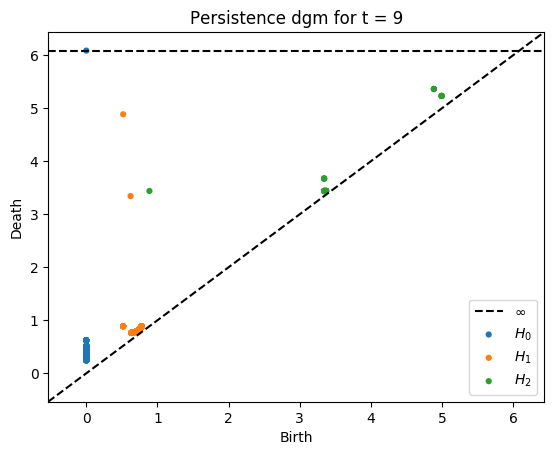

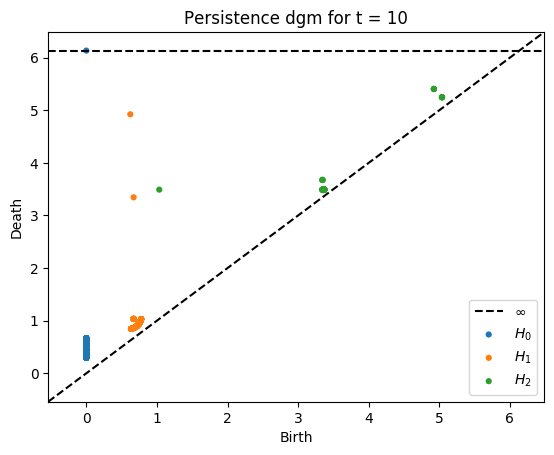

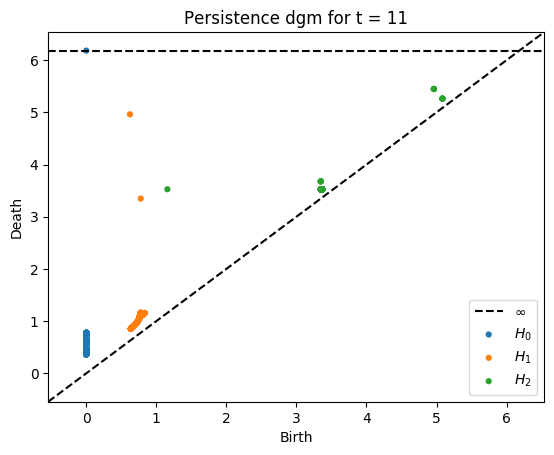

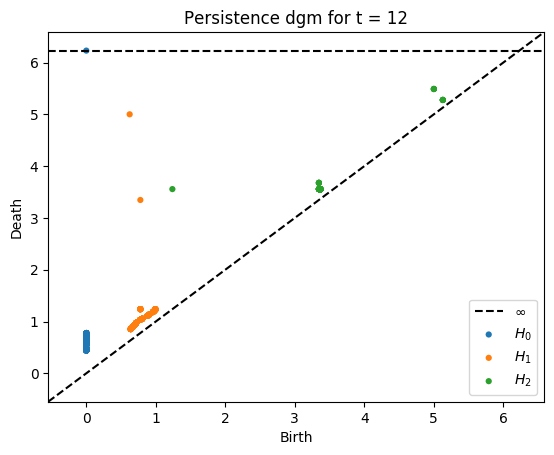

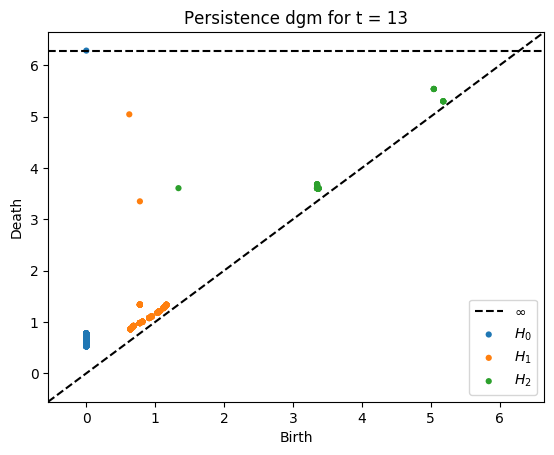

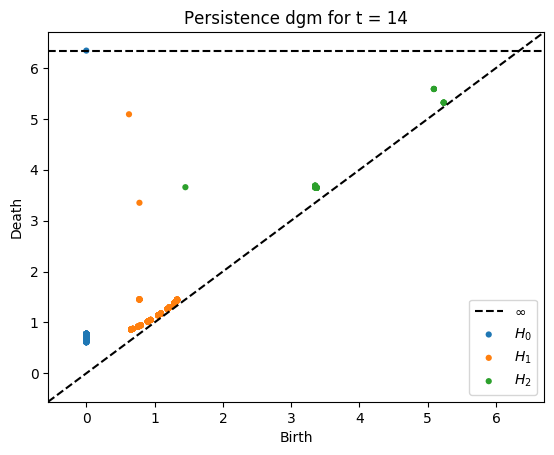

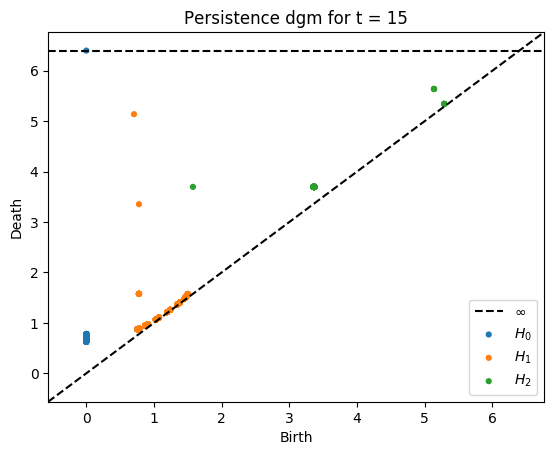

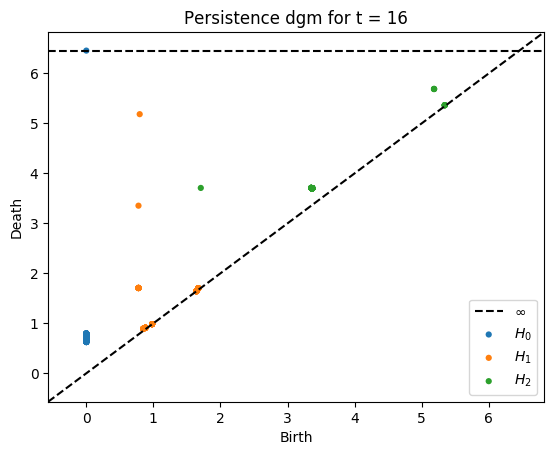

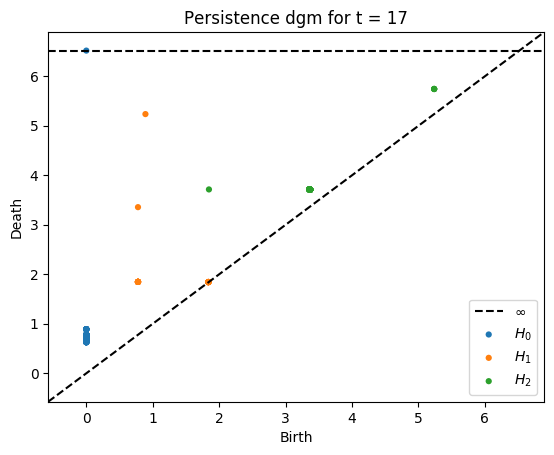

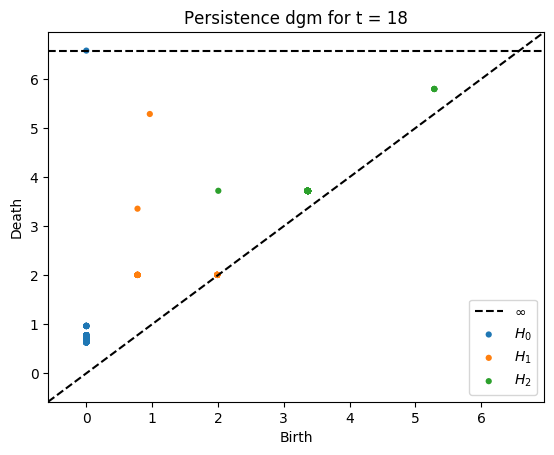

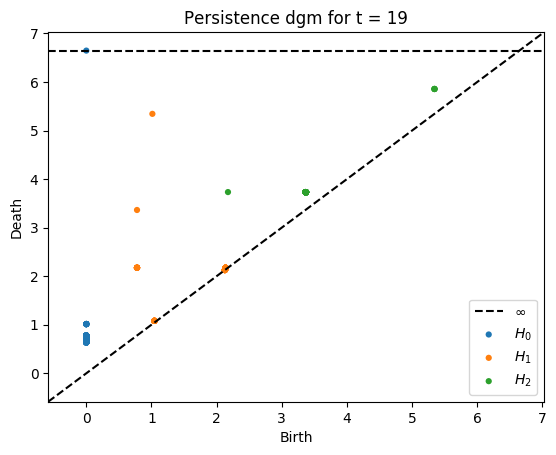

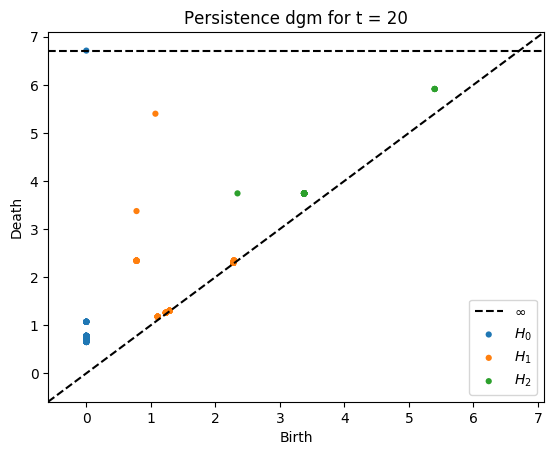

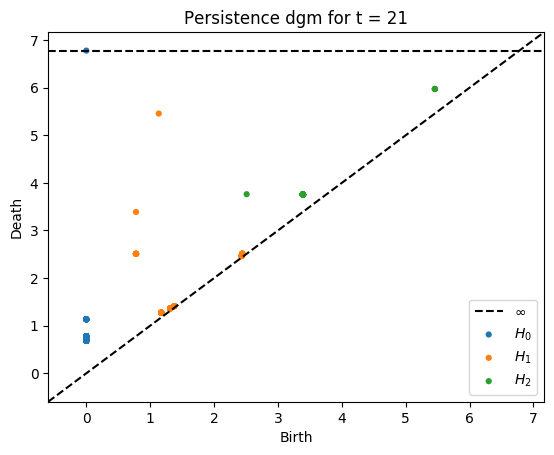

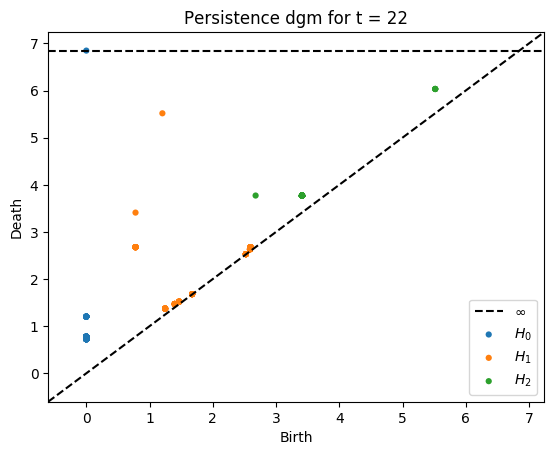

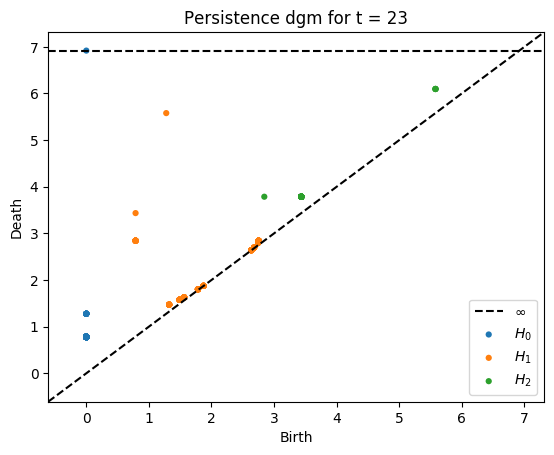

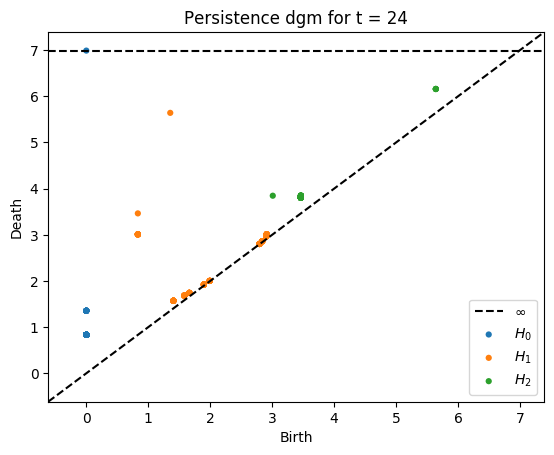

In [7]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

for i in range(t2s.bifilt.shape[0]):
    dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
    plt.clf()
    plt.title('Persistence dgm for t = '+ str(i+1))
    plot_diagrams(dgms, show = True)